In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
def exp(file, year):
    df = pd.read_excel(file)
    df = df.rename(columns={df.columns[0] : "Charateristics"})
    l = len(df.columns)
    df.columns = df.columns.str.strip()
    df.Charateristics = df.Charateristics.str.replace("\.", "")
    df.Charateristics = df.Charateristics.str.lstrip()
    df.Charateristics = df.Charateristics.str.rstrip()
    
    df = df.loc[df.Charateristics == "Secondary"]
    
    df = df.dropna(axis=1)
    df = df.drop(labels=["Charateristics"], axis=1)
    
    if year != 1994:
        col = len(df.columns) - 18
        df = df.drop(df.columns[0:col], axis=1)
    else:
        df = df.drop(columns=['|', "_", "_.1", "_.2", "Associate"], axis=1)
        
        for i in range(len(df.columns)):
            w = "|." + str(i)
            if w in df.columns:
                df.drop([w], axis=1, inplace=True)
        df = df.rename(columns={"No degree": "Less than bachelor's", })
                
    df["Date"] = year
    df['Date'] = pd.to_datetime(df["Date"], format='%Y')
    df.set_index("Date", inplace=True)
    
    for i in range(1,l):
        w = 'Unnamed: ' + str(i)
        if(w in df.columns):
            df = df.drop([w], axis=1)
        
    df = df.rename(columns={df.columns[3]: "Education Specialist"})
    return df

In [3]:
exp16 = exp("Exp 2016.xlsx", 2016)
exp12 = exp("Exp 2012.xlsx", 2012)
exp18 = exp("Exp 2018.xlsx", 2018)
exp08 = exp("2008 Exp.xlsx", 2008)
exp94 = exp("Exp 1994.xlsx", 1994)

In [4]:
ex = pd.concat([exp94, exp08, exp12, exp16, exp18])

In [5]:
degree = ex.iloc[:, :5]
years = ex.iloc[:, 5:]

Text(0, 0.5, 'Percent')

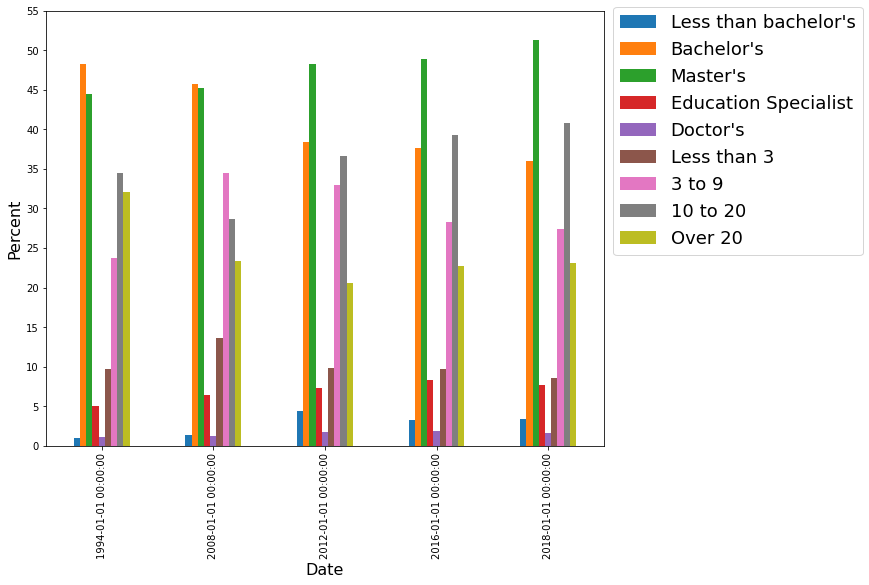

In [167]:
ax = ex.plot(kind="bar", figsize=(10,8), table=False, fontsize=10, linewidth=2.0, yticks=range(0, 60, 5))
ax = ax.legend(bbox_to_anchor=(1, 1.03), prop={'size':18})
plt.xlabel("Date", fontsize=16)
plt.ylabel("Percent", fontsize=16)

In [7]:
dropout = pd.read_excel("Graduation Rate.xlsx")

In [8]:
droput = dropout.dropna()
dropout = dropout.rename(columns={dropout.columns[0]: "Date"})

In [9]:
dropout = dropout.iloc[:, :2]
dropout = dropout.dropna()
dropout = dropout.reset_index()

In [10]:
bad_dates = dropout.Date.to_numpy(dtype="str")

In [11]:
for i in range(0, len(bad_dates)):
    bad_dates[i] = bad_dates[i][:4]
    if bad_dates[i] == "1994":
        start = i - 1

In [12]:
dropout = dropout.drop("Date", axis=1)
dropout["Date"] = bad_dates
dropout = dropout.drop(0)

In [13]:
dropout["Date"] = pd.to_datetime(dropout["Date"], format='%Y')

In [14]:
dropout = dropout.set_index("Date")

In [15]:
dropout = dropout.iloc[start:]

In [16]:
dropout = dropout.drop(dropout.columns[0], axis=1)
dropout = dropout.rename(columns={dropout.columns[0]: "Dropout Rate"})

In [18]:
grad_exp = dropout.join(ex)

In [19]:
exp_grad = ex.join(dropout)

In [20]:
#Old Graduation Data
grad = pd.read_excel("ACGR.xlsx")
grad = grad.dropna()
grad = grad.drop(grad.columns[0], axis=1)

for i in range(1,len(grad.columns) + 1):
    w = 'Unnamed: ' + str(i)
    if(w in grad.columns):
        grad = grad.drop([w], axis=1)

grad = grad.rename(index={grad.index[0]: "GraduationRate"})
grad = grad.transpose()
grad = grad.drop([grad.index[0]])
grad["Date"] = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
grad["Date"] = pd.to_datetime(grad["Date"], format="%Y")
grad.set_index("Date", inplace=True)

for i in range(1,len(grad.columns) + 1):
    w = 'Unnamed: ' + str(i)
    if(w in grad.columns):
        grad = grad.drop([w], axis=1)

In [21]:
def marks_background(file, col_list):
    mark = pd.read_excel(file)
    length = len(mark.columns)
    mark = mark.iloc[col_list]
    mark = mark.rename(columns={mark.columns[0]: "Charateristics"})

    for i in range(len(mark.columns)):
        w = "Unnamed: " + str(i)
        if w in mark.columns:
            mark = mark.drop([w], axis=1)

    mark["Charateristics"] = mark.Charateristics.replace('\.',' ', regex=True)
    mark = mark.dropna(axis=1)
    mark.set_index("Charateristics", inplace=True)
    #mark = mark.drop(mark.columns[0:4], axis=1)
    mark.columns = mark.columns.str.lstrip()
    mark = mark.transpose()
    mark.columns = mark.columns.str.lstrip()
    mark.columns = mark.columns.str.rstrip()
    mark = mark.rename(columns={mark.columns[2]: "Attended College", mark.columns[4]: "Bachelor's degree", mark.columns[5]: "Masters"})
    return mark

In [22]:
marks_16 = marks_background("Grades 03,12,16.xlsx", [17, 18, 20, 21, 23, 25, 35, 36, 37, 43])

In [23]:
marks_16

Charateristics,Less than high school,High school/GED,Attended College,Associate's degree,Bachelor's degree,Masters,Poor,Near-poor,Nonpoor,Secondary (grades 9 to 12)
Mostly A's,27.8223,32.1399,39.7642,46.7079,53.0378,61.8801,33.1351,34.8484,49.8903,34.5797
Mostly B's,41.637,41.4008,38.3303,34.4871,34.1759,30.5184,39.3675,41.9898,34.466,40.1788
Mostly C's,22.7098,21.6501,17.1946,16.3745,11.0866,6.65655,21.9096,18.1678,13.2141,20.6418
Mostly D's or F's,7.83091,4.80919,4.71084,2.43047,1.69965,0.944974,5.58788,4.99402,2.42962,4.59971
Mostly A's.1,39.5208,37.6531,43.476,47.0251,60.0984,68.0501,39.1359,40.0574,56.0303,37.5405
Mostly B's.1,39.6595,40.7558,38.0892,34.9409,31.4393,27.2868,38.9102,40.2698,32.6716,39.6625
Mostly C's.1,16.8287,17.6062,15.6136,15.3788,7.47797,4.19606,17.7562,16.9534,9.52412,18.4405
Mostly D's or F's.1,3.99101,3.98485,2.82122,2.65517,0.984353,0.467017,4.19774,2.71942,1.77399,4.35647
Mostly A's.2,30.2301,35.3456,41.4663,49.4187,60.1995,69.4256,32.6769,38.5287,57.9497,41.128
Mostly B's.2,36.2737,42.9609,37.9798,35.0304,31.0616,24.9907,37.0395,40.7596,31.6191,37.1781


In [24]:
marks_96 = marks_background("Grades 96,03,07.xlsx", [21, 22, 24, 25, 27, 29, 48])

In [25]:
marks_96 = marks_96.iloc[:4]

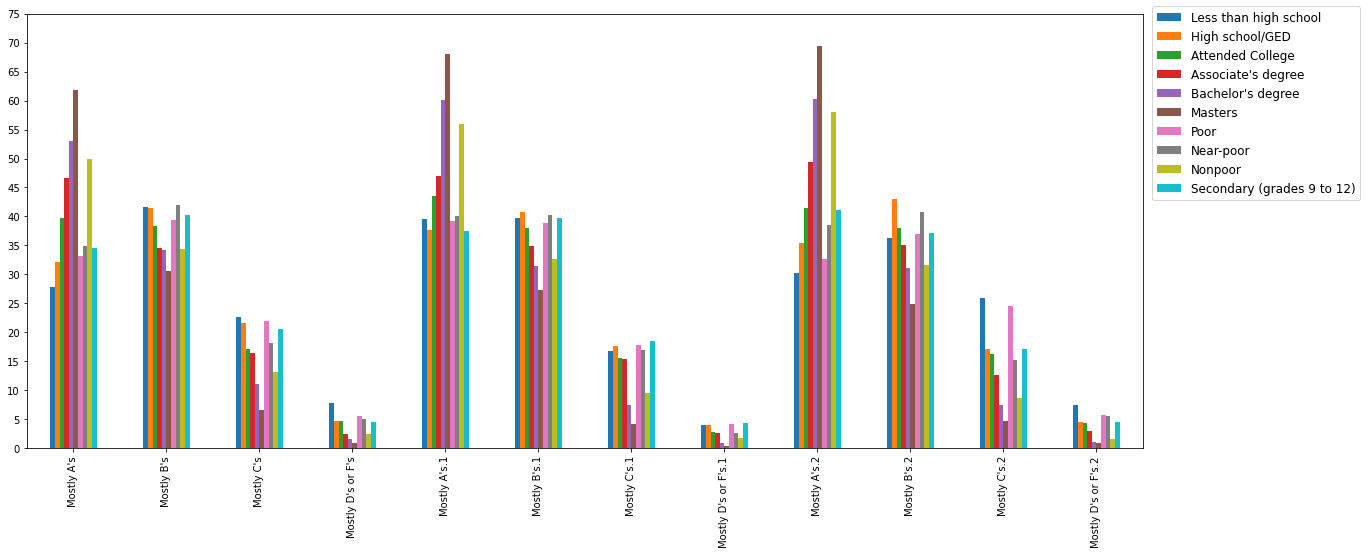

In [85]:
marks_16.plot(kind="bar", figsize=(20,8), yticks=range(0, 80, 5))
plt.legend(bbox_to_anchor=(1.2, 1.03), prop={'size':12})

In [27]:
marks_07 = marks_background("Grades 03,07,12.xlsx", [18, 19, 21, 22, 24, 26, 36, 37, 38, 44])

In [28]:
marks_07 = marks_07.iloc[4:8]

In [150]:
marks_16

Charateristics,Less than high school,High school/GED,Attended College,Associate's degree,Bachelor's degree,Masters,Poor,Near-poor,Nonpoor,Secondary (grades 9 to 12)
Mostly A's,27.8223,32.1399,39.7642,46.7079,53.0378,61.8801,33.1351,34.8484,49.8903,34.5797
Mostly B's,41.637,41.4008,38.3303,34.4871,34.1759,30.5184,39.3675,41.9898,34.466,40.1788
Mostly C's,22.7098,21.6501,17.1946,16.3745,11.0866,6.65655,21.9096,18.1678,13.2141,20.6418
Mostly D's or F's,7.83091,4.80919,4.71084,2.43047,1.69965,0.944974,5.58788,4.99402,2.42962,4.59971
Mostly A's.1,39.5208,37.6531,43.476,47.0251,60.0984,68.0501,39.1359,40.0574,56.0303,37.5405
Mostly B's.1,39.6595,40.7558,38.0892,34.9409,31.4393,27.2868,38.9102,40.2698,32.6716,39.6625
Mostly C's.1,16.8287,17.6062,15.6136,15.3788,7.47797,4.19606,17.7562,16.9534,9.52412,18.4405
Mostly D's or F's.1,3.99101,3.98485,2.82122,2.65517,0.984353,0.467017,4.19774,2.71942,1.77399,4.35647
Mostly A's.2,30.2301,35.3456,41.4663,49.4187,60.1995,69.4256,32.6769,38.5287,57.9497,41.128
Mostly B's.2,36.2737,42.9609,37.9798,35.0304,31.0616,24.9907,37.0395,40.7596,31.6191,37.1781


<h1>Compile Grades Together</h1>

In [155]:
def grade_final(df):
    g_final = df
    g_final = g_final.transpose()
    g_final = g_final.iloc[[-1]]
    return g_final

In [156]:
g_final = grade_final(marks_16)

In [157]:
g_final2 = grade_final(marks_07)

In [158]:
g_final3 = grade_final(marks_96)

In [159]:
g_1996 = g_final3
g_2003 = g_final.iloc[:, 0:4]
g_2007 = g_final2
g_2012 = g_final.iloc[:, 4:8]
g_2016 = g_final.iloc[:, 8:]

In [160]:
for i in range(len(g_2003.columns)):
    g_2007 = g_2007.rename(columns={g_2007.columns[i]: g_2003.columns[i]})
    g_2012 = g_2012.rename(columns={g_2012.columns[i]: g_2003.columns[i]})
    g_2016 = g_2016.rename(columns={g_2016.columns[i]: g_2003.columns[i]})

In [161]:
final = g_1996.append((g_2003, g_2007, g_2012, g_2016))

In [163]:
final["Date"] = [1996, 2003, 2008, 2012, 2016]
final["Date"] = pd.to_datetime(final["Date"], format='%Y')
final = final.set_index("Date")

In [164]:
final.columns = final.columns.str.replace("\.1", "")

In [165]:
final

,Mostly A's,Mostly B's,Mostly C's,Mostly D's or F's
Date,,,,
1996-01-01,29.5732,40.2015,24.4972,5.72807
2003-01-01,34.5797,40.1788,20.6418,4.59971
2008-01-01,38.6043,39.0737,17.1639,5.1581
2012-01-01,37.5405,39.6625,18.4405,4.35647
2016-01-01,41.128,37.1781,17.1459,4.54797


In [62]:
dates = pd.DataFrame({"Date": [1994, 1996, 2003, 2008, 2012, 2016, 2018], "Rand": [1994, 1996, 2003, 2008, 2012, 2016, 2018]})
dates["Date"] = pd.to_datetime(dates["Date"], format='%Y')
dates = dates.set_index("Date")

In [63]:
dates = dates.join(grad_exp)

In [100]:
full_graph = dates.join(final)

In [102]:
full_graph

,Dropout Rate,Less than bachelor's,Bachelor's,Master's,Education Specialist,Doctor's,Less than 3,3 to 9,10 to 20,Over 20,Mostly A's,Mostly B's,Mostly C's,Mostly D's or F's
Date,,,,,,,,,,,,,,
1994-01-01,11.445125,0.912404,48.2216,44.4177,5.07615,1.08657,9.67625,23.7605,34.5231,32.04,NaN,NaN,NaN,NaN
1996-01-01,11.126410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5732,40.2015,24.4972,5.72807
2003-01-01,9.861575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.5797,40.1788,20.6418,4.59971
2008-01-01,8.011285,1.3409,45.693,45.2462,6.4518,1.2681,13.5579,34.4873,28.6235,23.3313,38.6043,39.0737,17.1639,5.1581
2012-01-01,6.603999,4.38881,38.3697,48.2265,7.23763,1.77741,9.77272,33.0178,36.6602,20.5493,37.5405,39.6625,18.4405,4.35647
2016-01-01,6.083985,3.2,37.7,48.9,8.3,1.8,9.7,28.3,39.3,22.7,41.128,37.1781,17.1459,4.54797
2018-01-01,5.701609,3.39092,36.0075,51.332,7.67547,1.59415,8.58524,27.3943,40.8622,23.1583,NaN,NaN,NaN,NaN


In [101]:
full_graph = full_graph.drop(dates.columns[0], axis=1)

In [133]:
full_degree = full_graph.drop(full_graph.columns[7:11], axis=1)
full_year = full_graph.drop(full_graph.columns[1:6], axis=1)

All Graphs:
- full_graph: Plots everything
- mark_(yr): Plots the replationship between grades and other factors
- grad_exp: Plots comparison between graduation rate and experience, using grad rate years
- exp_grad: Plots comparison between graduation rate and experience, using exp years
- degree: Plots degree teachers have
- years: Plots years of teaching experience

In [128]:
def graph(df, typ="bar"):
    df.plot(kind=typ, figsize=(18,8), table=False, fontsize=10, linewidth=2.0, yticks=range(0, 60, 10))
    plt.legend(bbox_to_anchor=(1, 1.03), prop={'size':18})
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Percent", fontsize=16)

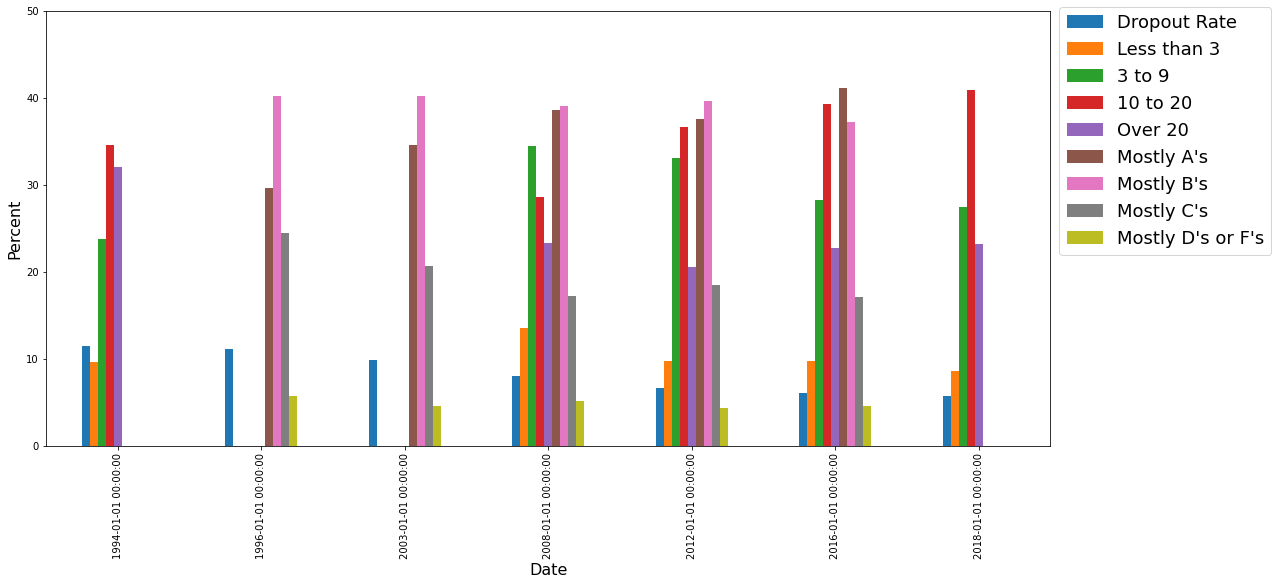

In [134]:
graph(full_year) #full degree, full year